In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2D

In [2]:
n_points = 100
points = np.random.randn(n_points,2)
points.shape

(100, 2)

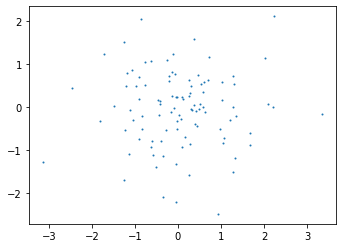

In [3]:
fig0 = plt.figure()
ax0 = fig0.gca()
ax0.set_aspect("equal")
ax0.scatter(points[:,0], points[:,1], s=1.)

In [4]:
d = (points[:,0]**2+points[:,1]**2)**0.5
d.shape

(100,)

In [5]:
norm_points = (points.T/d.T).T
norm_points.shape

(100, 2)

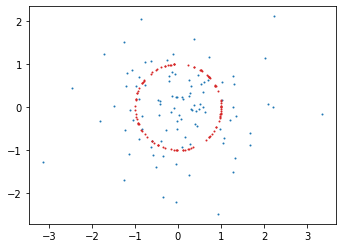

In [6]:
fig1 = plt.figure()
ax1 = fig1.gca()
ax1.set_aspect("equal")
ax1.scatter(points[:,0], points[:,1], s=1, c="C0")
ax1.scatter(norm_points[:,0], norm_points[:,1], s=1, c="C3")

# 3D

In [48]:
n_points = 500
points = np.random.randn(n_points,3)
points.shape

(500, 3)

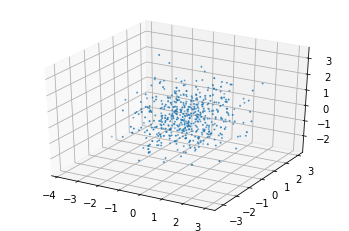

In [49]:
fig2 = plt.figure()
ax2 = fig2.gca(projection="3d")
ax2.scatter(points[:,0], points[:,1], points[:,2], s=1.)

In [50]:
d = (points[:,0]**2+points[:,1]**2+points[:,2]**2)**0.5
d.shape

(500,)

In [51]:
norm_points = (points.T/d.T).T
norm_points.shape

(500, 3)

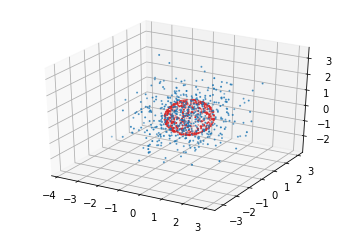

In [52]:
fig3 = plt.figure()
ax3 = fig3.gca(projection="3d")
ax3.scatter(points[:,0], points[:,1], points[:,2],s=1, c="C0")
ax3.scatter(norm_points[:,0], norm_points[:,1], norm_points[:,2], s=1, c="C3")

# nD

In [53]:
n_points = 5000
n_dims = 5
points = np.random.randn(n_points,n_dims)
points.shape

(5000, 5)

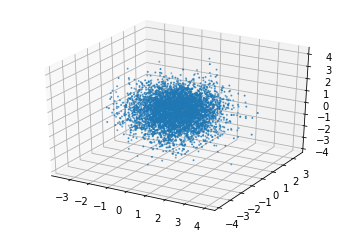

In [54]:
fig2 = plt.figure()
ax2 = fig2.gca(projection="3d")
ax2.scatter(points[:,0], points[:,1], points[:,2], s=1.)

In [55]:
points.shape

(5000, 5)

In [56]:
d = (points**2).sum(axis=1)**0.5
d.shape

(5000,)

In [57]:
norm_points = (points.T/d.T).T
norm_points.shape

(5000, 5)

3 dimensions shown of 5: 1 0 3 


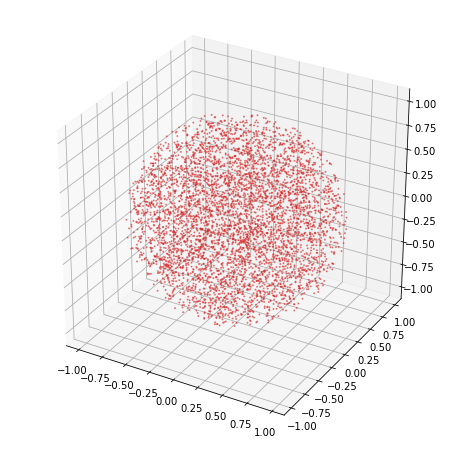

In [67]:
fig3 = plt.figure(figsize=(8,8))

dims = np.array([0,0,0])
while len(set(dims))<3:                         # ensure unique 3
    dims = np.random.randint(0, n_dims, size=3) # choose 3 random dimensions to observe
    
ax3 = fig3.gca(projection="3d")
# ax3.scatter(points[:,dims[0]], points[:,dims[1]], points[:,dims[2]],s=1, c="C0", alpha=0.2)
ax3.scatter(norm_points[:,0], norm_points[:,1], norm_points[:,2], s=1, c="C3", alpha=0.5)
print("3 dimensions shown of {}: {} {} {} ".format(n_dims, *dims))

# Function

In [95]:
def scatter_nsphere(n_points, n_dims):
    """scatter n_points onto unit n-spere with n_dims dimensions"""
    points = np.random.randn(n_points,n_dims) 
    d = (points**2).sum(axis=1)**0.5
    norm_points = (points.T/d.T).T
    return np.abs(norm_points)

In [96]:
pnd = scatter_nsphere(1000, 3)

3 dimensions shown of 5: 1 0 2 


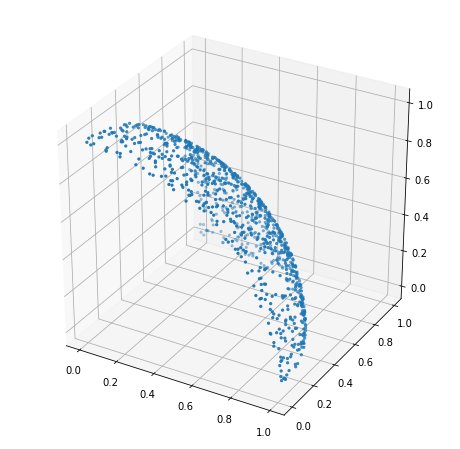

In [97]:
fig4 = plt.figure(figsize=(8,8))

dims = np.array([0,0,0])
while len(set(dims))<3:                         # ensure unique 3
    dims = np.random.randint(0, pnd.shape[1], size=3) # choose 3 random dimensions to observe
    
ax4 = fig4.gca(projection="3d")
ax4.scatter(pnd[:,dims[0]], pnd[:,dims[1]], pnd[:,dims[2]],s=5, c="C0")
print("3 dimensions shown of {}: {} {} {} ".format(n_dims, *dims))

# warped

In [175]:
n_points = 15000
points = np.random.randn(n_points,3)*np.array([1,4,1])
points.shape

(15000, 3)

In [176]:
point_min = points.min(axis=0)
point_max = points.max(axis=0)
point_range = point_max-point_min
point_mid = (point_min+point_max)/2

In [177]:
print(point_min)
print(point_max)
print(point_range)
print(point_mid)

[ -3.44289993 -16.38336204  -3.55651837]
[ 4.08043812 16.47133484  3.46330484]
[ 7.52333806 32.85469688  7.01982321]
[ 0.3187691   0.0439864  -0.04660676]


(-32.81071047421329, 32.89868327818291)

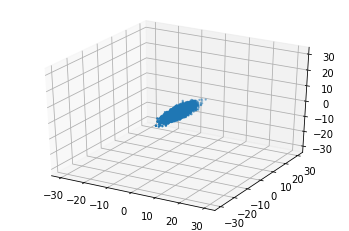

In [178]:
fig2 = plt.figure()
ax2 = fig2.gca(projection="3d")
ax2.scatter(points[:,0], points[:,1], points[:,2], s=2.)
ax2.set_xlim(point_mid[1] - point_range[1], point_mid[1] + point_range[1])
ax2.set_ylim(point_mid[1] - point_range[1], point_mid[1] + point_range[1])
ax2.set_zlim(point_mid[1] - point_range[1], point_mid[1] + point_range[1])

In [179]:
d = (points[:,0]**2+points[:,1]**2+points[:,2]**2)**0.5
d.shape

(15000,)

In [180]:
norm_points = (points.T/d.T).T
norm_points.shape

(15000, 3)

(-1.6405355237106645, 1.6449341639091455)

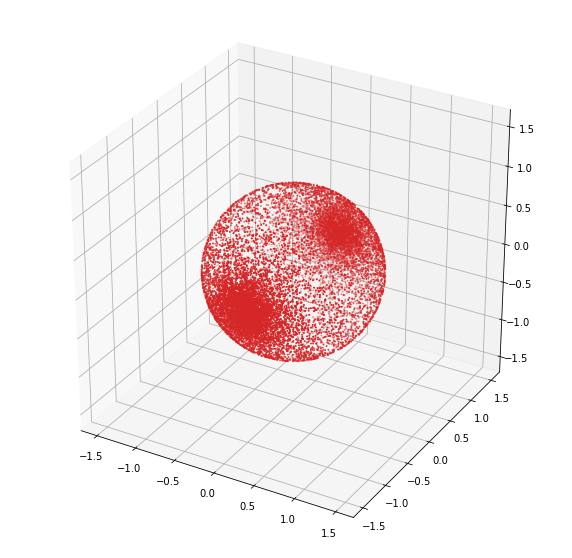

In [182]:
fig3 = plt.figure(figsize=[10, 10])
ax3 = fig3.gca(projection="3d")
# ax3.scatter(points[:,0], points[:,1], points[:,2],s=1, c="C0")
ax3.scatter(norm_points[:,0], norm_points[:,1], norm_points[:,2], s=1, c="C3")
ax3.set_xlim((point_mid[1] - point_range[1])/20, (point_mid[1] + point_range[1])/20)
ax3.set_ylim((point_mid[1] - point_range[1])/20, (point_mid[1] + point_range[1])/20)
ax3.set_zlim((point_mid[1] - point_range[1])/20, (point_mid[1] + point_range[1])/20)

In [184]:
def scatter_nsphere(n_points, n_dims, weighting=None):
    """scatter n_points onto unit n-spere with n_dims dimensions"""
    if weighting is None:
        weighting = np.ones(n_dims)
    else:
        weighting = np.array(weighting)
    points = np.random.randn(n_points,n_dims)*weighting
    d = (points**2).sum(axis=1)**0.5
    norm_points = (points.T/d.T).T
    return np.abs(norm_points)

In [190]:
points = scatter_nsphere(5000, 3, [1, 5, 1])

Text(0.5, 0, 'f3')

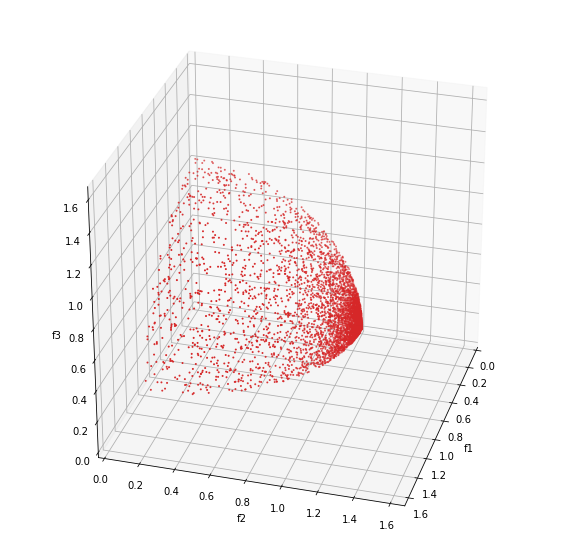

In [194]:
fig6 = plt.figure(figsize=[10, 10])
ax6 = fig6.gca(projection="3d")
# ax3.scatter(points[:,0], points[:,1], points[:,2],s=1, c="C0")
ax6.scatter(points[:,0], points[:,1], points[:,2], s=1, c="C3")
ax6.set_xlim(0, (point_mid[1] + point_range[1])/20)
ax6.set_ylim(0, (point_mid[1] + point_range[1])/20)
ax6.set_zlim(0, (point_mid[1] + point_range[1])/20)
ax6.view_init(30, 16)
ax6.set_xlabel("f1")
ax6.set_ylabel("f2")
ax6.set_zlabel("f3")